In [130]:
import pandas as pd
import matplotlib
import math as mth

In [131]:
# Ознакомление с документом
data = pd.read_csv(r'C:\Users\User\Downloads\data.csv', thousands=',')
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21


In [132]:
# Оценка объёма данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


Данные сответствуют своим типам

В документе есть пустой столбец.

# Предобработка данных

In [133]:
data = data.drop(1)

## Изменяем тип данных

In [134]:
data['receiving_date'] = pd.to_datetime(data['receiving_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       723 non-null    float64       
 1   sum             723 non-null    float64       
 2   status          729 non-null    object        
 3   sale            723 non-null    object        
 4   new/current     723 non-null    object        
 5   Unnamed: 5      0 non-null      float64       
 6   document        708 non-null    object        
 7   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 51.3+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_2744\1438990242.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['receiving_date'] = pd.to_datetime(data['receiving_date'])


In [135]:
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-06
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07


## Поиск пропусков

In [136]:
data.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        729
document           21
receiving_date    123
dtype: int64

In [137]:
# Выведем строки с пропусками в столбце 'client_id'
data[data['client_id'].isna()]

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT
129,NaN,NaN,Июнь 2021,NaN,NaN,NaN,NaN,NaT
258,NaN,NaN,Июль 2021,NaN,NaN,NaN,NaN,NaT
369,NaN,NaN,Август 2021,NaN,NaN,NaN,NaN,NaT
484,NaN,NaN,Сентябрь 2021,NaN,NaN,NaN,NaN,NaT
594,NaN,NaN,Октябрь 2021,NaN,NaN,NaN,NaN,NaT


Видно, что все 6 пропусков в столбцах от 'client_id' до 'new/current' встречается во время записи в столбце 'status' о начале нового периода. Следовательно, поступим следующим образом: строки с записями начала нового периода удалим - так мы избавимся от пропусков в перечисленых выше столбцах, а для записей о новом периоде создадим новый столбец. Столбец 'Unnamed: 5' удалим, он целиком пустой.

### Шаг 1: Соотносим значения месяца совершения сделки в столбец 'Unnamed: 5'

In [138]:
data.loc[2:128, 'Unnamed: 5'] = '05.01.2021'
data.loc[130:257, 'Unnamed: 5'] = '06.01.2021'
data.loc[259:368, 'Unnamed: 5'] = '07.01.2021'
data.loc[370:483, 'Unnamed: 5'] = '08.01.2021'
data.loc[485:593, 'Unnamed: 5'] = '09.01.2021'
data.loc[595:729, 'Unnamed: 5'] = '10.01.2021'

In [139]:
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,05.01.2021,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,05.01.2021,оригинал,2021-08-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,05.01.2021,оригинал,2021-08-06
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,05.01.2021,оригинал,2021-07-07


### Поменяем тип данных столбца 'month'

In [140]:
data['Unnamed: 5'] = pd.to_datetime(data['Unnamed: 5'])
data['Unnamed: 5'].info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 0 to 729
Series name: Unnamed: 5
Non-Null Count  Dtype         
--------------  -----         
723 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.6 KB


### Шаг 2: Переименуем столбец 'Unnamed: 5' в 'month'

In [141]:
data = data.rename(columns={'Unnamed: 5':'month'})

### Шаг 3: удалим пропуски в строках объявления месяца в столбце 'status'

In [142]:
data = data.drop([0, 129, 258, 369, 484, 594])

## Проверка на пропуски

In [143]:
data.isna().sum()

client_id           0
sum                 0
status              0
sale                0
new/current         0
month               0
document           15
receiving_date    117
dtype: int64

Сделать проверку на наличие оригинала подписанного договора с клиентом мы не можем, пэтому оставим пропуски как есть. В остальных столбцах пропуски удалены.

In [144]:
data

,client_id,sum,status,sale,new/current,month,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,2021-10-01,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,2021-10-01,оригинал,2021-08-11


## Вопрос 1: Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен

In [145]:
july = data.query('month == "2021-07-01" and status == "ОПЛАЧЕНО"')
print('Общая выручка за июль 2021 =', july['sum'].sum())

Общая выручка за июль 2021 = 859896.4699999997


## Вопрос 2: Как изменялась выручка компании за рассматриваемый период?

In [146]:
vyruchka = data.pivot_table(index='month', values='sum', aggfunc='sum').reset_index()
vyruchka

,month,sum
0,2021-05-01,797878.49
1,2021-06-01,810266.11
2,2021-07-01,861874.17
3,2021-08-01,850435.79
4,2021-09-01,820383.78
5,2021-10-01,1033148.39


<Axes: xlabel='month'>

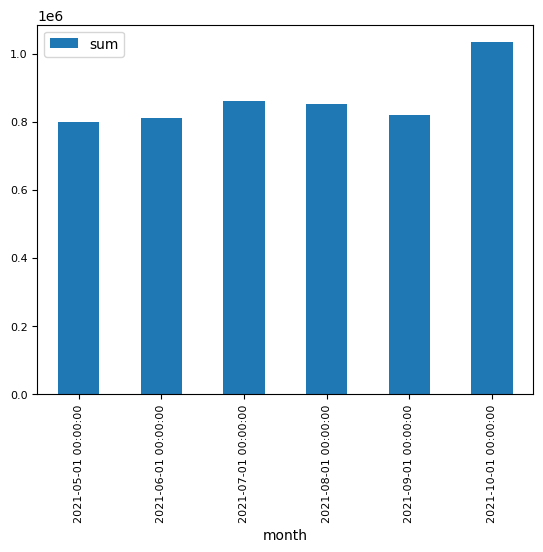

In [147]:
vyruchka.plot(x='month', y='sum', kind='bar', fontsize=8)

По графику видно, что самая большая выручка пришлась на октябрь 2021

## Вопрос 3: Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [148]:
september = data.query('month == "2021-09-01"')

In [149]:
vyr_sep = september.pivot_table(index='sale', values='sum', aggfunc='sum').sort_values('sum', ascending=False).reset_index()
vyr_sep

,sale,sum
0,Смирнов,221525.70
1,Петрова,149344.46
2,Андреев,133652.50
3,Иванов,94770.60
4,Кузнецова,72228.40
5,Филимонова,59514.47
6,Васильев,49895.45
7,Соколов,35183.50
8,Михайлов,4268.70


Больше всего денежных средств в сентябре 2021 привлёк менеджер по фамилии Смирнов - 221525.7

## Вопрос 4: Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [150]:
october = data.query('month == "2021-10-01"')

In [151]:
october['new/current'].value_counts()

new/current
текущая    99
новая      36
Name: count, dtype: int64

Преобладающим типом сделок в октябре 2021 была текущая - 99

## Вопрос 5: Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [152]:
may = data.query('month == "2021-05-01"')

In [153]:
may = may.query('receiving_date <= "2021-06-30" and receiving_date >= "2021-06-01"')
may['document'].value_counts()

document
оригинал    37
Name: count, dtype: int64

Оригиналов договора по майским сделкам в июне 2021 было получено 37

# ЗАДАНИЕ

In [154]:
data

,client_id,sum,status,sale,new/current,month,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,2021-10-01,оригинал,2021-11-15
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,2021-10-01,оригинал,2021-08-11


# Выделим менеджеров, которые получают бонусы

### Шаг 1: Создадим таблицу, где оригиналы документов выдаются в том же месяце, что и сделка.

#### Добавим в таблицу номера месяцев сделок и выдачи докуметнов

In [155]:
# Переименуем столбец "new/current"
data = data.rename(columns={'new/current':'type'})

In [156]:
data['month_sdelka'] = pd.DatetimeIndex(data['month']).month
data['receiving_month'] = pd.DatetimeIndex(data['receiving_date']).month
data.head()

,client_id,sum,status,sale,type,month,document,receiving_date,month_sdelka,receiving_month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26,5,7.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07,5,7.0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15,5,7.0


### Шаг 2: Сделаем срез таблицы до 1 июля 2021 года

In [157]:
data_july = data.query('month_sdelka < 7 and month_sdelka != receiving_month')
data_july.head()

,client_id,sum,status,sale,type,month,document,receiving_date,month_sdelka,receiving_month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26,5,7.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07,5,7.0
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15,5,7.0


### Шаг 3: Создадим новый столбец, где расчитан бонус менеджера, который считается остатком.

In [158]:
def bonus(row):
    if (row['type'] == "новая") and (row['status'] == "ОПЛАЧЕНО") and (row['document'] == "оригинал"):
        return 0.07 * row['sum']
    elif (row['type'] == "текущая") and (row['sum'] > 10000) and (row['status'] == "ОПЛАЧЕНО") and (row['document'] == "оригинал"):
        return 0.05 * row['sum']
    elif (row['type'] == "текущая") and (row['sum'] < 10000) and (row['status'] == "ОПЛАЧЕНО") and (row['document'] == "оригинал"):
        return 0.03 * row['sum']
    
data_july['bonus'] = data_july.apply(lambda row: bonus(row), axis=1)
data_july.head()

C:\Users\User\AppData\Local\Temp\ipykernel_2744\2154958277.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_july['bonus'] = data_july.apply(lambda row: bonus(row), axis=1)


,client_id,sum,status,sale,type,month,document,receiving_date,month_sdelka,receiving_month,bonus
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26,5,7.0,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0,699.585
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-08-06,5,8.0,21.591
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07,5,7.0,127.611
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,2021-05-01,оригинал,2021-07-15,5,7.0,173.901


### Шаг 4: Посчитаем остаток каждого менеджера на 01.07.2021

In [159]:
ostatok = data_july.pivot_table(index='sale', values='bonus', aggfunc='sum').sort_values('bonus', ascending=False).reset_index()
ostatok

,sale,bonus
0,Петрова,15630.7424
1,Смирнов,10508.9890
2,Кузнецова,7101.6217
3,Андреев,6830.5354
4,Иванов,6150.4400
5,Селиванов,2939.8830
6,Филимонова,2624.0299
7,Васильев,1376.2800
8,Соколов,269.2110
